# Project: Predicting house prices in Melbourne using regression
### Data set used: https://www.kaggle.com/spotbox/melbourne-house-prices 
### by Srihari Sridhar

In [393]:
import matplotlib 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Cleaning

In [394]:
df1 = pd.read_csv("melb_data.csv")
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [395]:
# Dropping features that don't heavily influence housing price 
df2 = df1.drop(['Address', 'Type', 'Method', 'SellerG','YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount','BuildingArea','Date','Distance','Postcode','Bedroom2','Car'],axis='columns')
df2.head(5)

,Suburb,Rooms,Price,Bathroom,Landsize
0,Abbotsford,2,1480000.0,1.0,202.0
1,Abbotsford,2,1035000.0,1.0,156.0
2,Abbotsford,3,1465000.0,2.0,134.0
3,Abbotsford,3,850000.0,2.0,94.0
4,Abbotsford,4,1600000.0,1.0,120.0


In [396]:
# Checking if NULL values exist anywhere in the data frame
df2.isnull().sum()

Suburb      0
Rooms       0
Price       0
Bathroom    0
Landsize    0
dtype: int64

In [397]:
# Removing rows that have null values in car park feature
df3 = df2.dropna()
df3.isnull().sum()

Suburb      0
Rooms       0
Price       0
Bathroom    0
Landsize    0
dtype: int64

In [398]:
# Room feature - All room numbers are integers. So no editing of data required
df3.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10], dtype=int64)

In [399]:
# Landsize feature (sqm) 
# Ensure we have all float values
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [400]:
df3[~df3['Landsize'].apply(is_float)].head(10)

,Suburb,Rooms,Price,Bathroom,Landsize


In [401]:
# Dropping 0 values 
df3.replace([0], np.nan)
df3.dropna(inplace=True)

In [402]:
df4= df3[df3['Landsize'] != 0]
df4.head(10)

,Suburb,Rooms,Price,Bathroom,Landsize
0,Abbotsford,2,1480000.0,1.0,202.0
1,Abbotsford,2,1035000.0,1.0,156.0
2,Abbotsford,3,1465000.0,2.0,134.0
3,Abbotsford,3,850000.0,2.0,94.0
4,Abbotsford,4,1600000.0,1.0,120.0
5,Abbotsford,2,941000.0,1.0,181.0
6,Abbotsford,3,1876000.0,2.0,245.0
7,Abbotsford,2,1636000.0,1.0,256.0
9,Abbotsford,2,1097000.0,1.0,220.0
11,Abbotsford,3,1350000.0,2.0,214.0


### Feature engineering

In [403]:
# Introducing a new column "price_per_msq"
df4['price_per_msq'] = round(df4['Price']/df4['Landsize'], 0)
df4.head(5)

C:\Users\X2\AppData\Local\Temp/ipykernel_16348/2502586194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_msq'] = round(df4['Price']/df4['Landsize'], 0)


,Suburb,Rooms,Price,Bathroom,Landsize,price_per_msq
0,Abbotsford,2,1480000.0,1.0,202.0,7327.0
1,Abbotsford,2,1035000.0,1.0,156.0,6635.0
2,Abbotsford,3,1465000.0,2.0,134.0,10933.0
3,Abbotsford,3,850000.0,2.0,94.0,9043.0
4,Abbotsford,4,1600000.0,1.0,120.0,13333.0


In [404]:
df4_stats = df4['price_per_msq'].describe()
df4_stats

count     11641.000000
mean       3365.210549
std       10064.506997
min           6.000000
25%        1387.000000
50%        2364.000000
75%        3964.000000
max      710000.000000
Name: price_per_msq, dtype: float64

### Dimensionality Reduction

In [405]:
df4.Suburb = df4.Suburb.apply(lambda x: x.strip())
Suburb_stats = df4['Suburb'].value_counts(ascending=False)
Suburb_stats

C:\Users\X2\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Reservoir         337
Bentleigh East    240
Preston           230
Richmond          196
Brunswick         187
                 ... 
Bacchus Marsh       1
Healesville         1
Bullengarook        1
Rockbank            1
Monbulk             1
Name: Suburb, Length: 312, dtype: int64

In [406]:
#Tagging suburbs with less than 10 data points as "other". The remaining categories will be refered using one hot coding 
Suburb_stats_less_than_10 = Suburb_stats[Suburb_stats<=10]

In [407]:
df4.Suburb = df4.Suburb.apply(lambda x: 'other' if x in Suburb_stats_less_than_10 else x)
len(df4.Suburb.unique())

202

### Outlier Removal 
#### Bedroom feature

In [408]:
# A bedroom on average is about 60-75 sqm. So anything below 50sqm is treated as an outlier and hence removed
df4[df4.Landsize/df4.Rooms<50].head()

,Suburb,Rooms,Price,Bathroom,Landsize,price_per_msq
2,Abbotsford,3,1465000.0,2.0,134.0,10933.0
3,Abbotsford,3,850000.0,2.0,94.0,9043.0
4,Abbotsford,4,1600000.0,1.0,120.0,13333.0
16,Abbotsford,3,1200000.0,2.0,113.0,10619.0
17,Abbotsford,3,1176500.0,1.0,138.0,8525.0


In [409]:
df5 = df4[~(df4.Landsize/df4.Rooms<50)]
df5.shape

(11070, 6)

In [410]:
df5.price_per_msq.describe()

count    11070.000000
mean      2817.130623
std       2095.924232
min          6.000000
25%       1354.000000
50%       2252.000000
75%       3664.000000
max      20568.000000
Name: price_per_msq, dtype: float64

In [411]:
# Removing outliers using mean and standard deviation as criteria (Minimum is 6AUD/sqm while max is 20568 AUD/sqm)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Suburb'):
        m = np.mean(subdf.price_per_msq)
        st = np.std(subdf.price_per_msq)
        reduced_df = subdf[(subdf.price_per_msq>(m-st)) & (subdf.price_per_msq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(8353, 6)

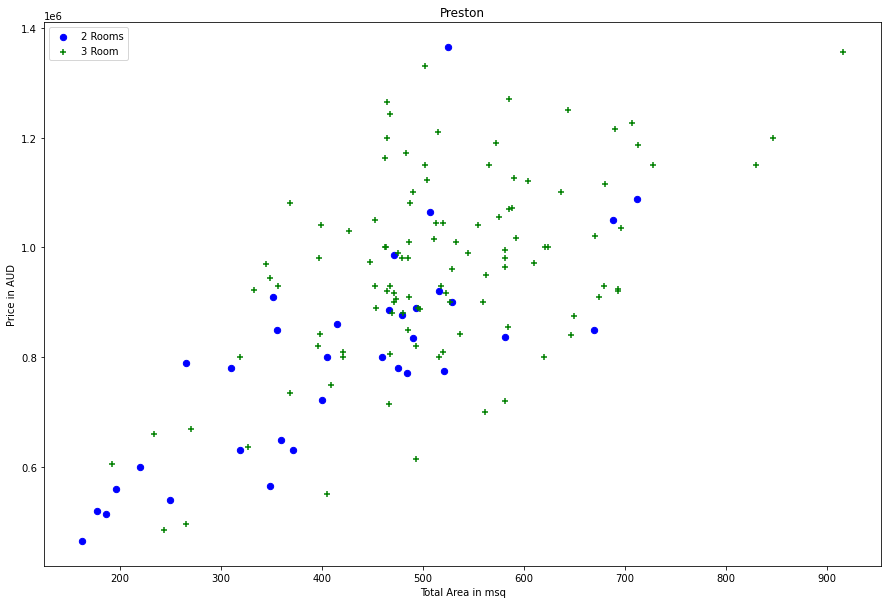

In [412]:
def plot_scatter_chart(df,Suburb):
    Room2 = df[(df.Suburb==Suburb) & (df.Rooms==2)]
    Room3 = df[(df.Suburb==Suburb) & (df.Rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(Room2.Landsize,Room2.Price,color='blue',label='2 Rooms', s=40)
    plt.scatter(Room3.Landsize,Room3.Price,marker='+', color='green',label='3 Room', s=40)
    plt.xlabel("Total Area in msq")
    plt.ylabel("Price in AUD")
    plt.title(Suburb)
    plt.legend()
plot_scatter_chart(df6,"Preston")

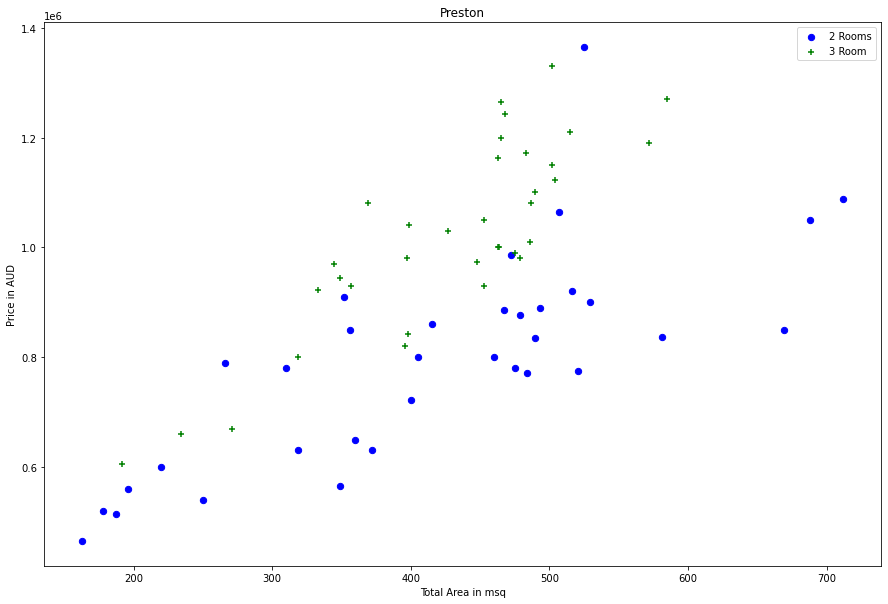

In [413]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Suburb, Suburb_df in df.groupby('Suburb'):
        Rooms_stats = {}
        for Rooms, Rooms_df in Suburb_df.groupby('Rooms'):
            Rooms_stats[Rooms] = {
                'mean': np.mean(Rooms_df.price_per_msq),
                'std': np.std(Rooms_df.price_per_msq),
                'count': Rooms_df.shape[0]
            }
        for Rooms, Rooms_df in Suburb_df.groupby('Rooms'):
            stats = Rooms_stats.get(Rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Rooms_df[Rooms_df.price_per_msq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
plot_scatter_chart(df7,"Preston")

#### Bathroom feature

Text(0, 0.5, 'Count')

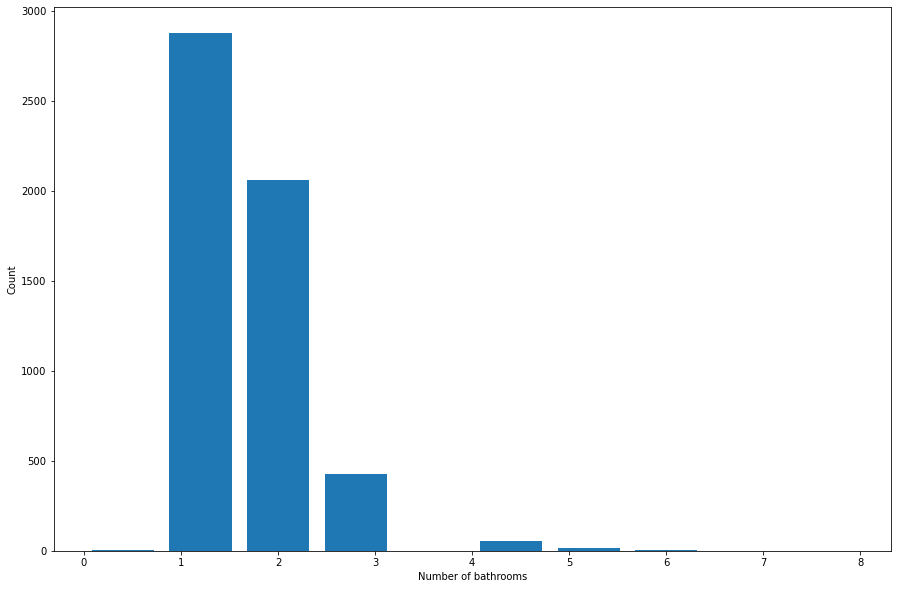

In [414]:
plt.hist(df7.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

### It is unusual to have more bathrooms than the total number of bedrooms

In [415]:
df7[df7.Bathroom>df7.Rooms]

,Suburb,Rooms,Price,Bathroom,Landsize,price_per_msq
27,Aberfeldie,1,1720000.0,2.0,676.0,2544.0
458,Avondale Heights,4,1200000.0,5.0,673.0,1783.0
550,Balwyn,5,3400000.0,6.0,739.0,4601.0
1284,Brighton East,2,1780000.0,3.0,635.0,2803.0
1322,Brighton East,2,1310000.0,3.0,302.0,4338.0
1348,Brighton East,3,1750800.0,4.0,424.0,4129.0
2905,Fawkner,3,751000.0,6.0,592.0,1269.0
3555,Hadfield,2,722000.0,3.0,580.0,1245.0
3612,Hampton,2,742000.0,3.0,245.0,3029.0
3635,Hampton,1,2450000.0,2.0,994.0,2465.0


In [416]:
df8 = df7[df7.Bathroom<df7.Rooms]
df8.shape

(5174, 6)

### One hot encoding for location

In [417]:
dummies = pd.get_dummies(df7.Suburb)
df8 = pd.concat([df7,dummies.drop(['other'],axis='columns')],axis='columns')
df8.head(10)

,Suburb,Rooms,Price,Bathroom,Landsize,price_per_msq,Abbotsford,Aberfeldie,Airport West,Albert Park,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,Abbotsford,2,1480000.0,1.0,202.0,7327.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,2,1035000.0,1.0,156.0,6635.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,2,941000.0,1.0,181.0,5199.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,3,1876000.0,2.0,245.0,7657.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,2,1636000.0,1.0,256.0,6391.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Abbotsford,2,1097000.0,1.0,220.0,4986.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Abbotsford,3,1350000.0,2.0,214.0,6308.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Abbotsford,2,1172500.0,1.0,195.0,6013.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Abbotsford,2,1310000.0,1.0,238.0,5504.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Abbotsford,2,890000.0,1.0,150.0,5933.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
df9 = df8.drop(['Suburb','price_per_msq'],axis='columns')
df9.head(5)

,Rooms,Price,Bathroom,Landsize,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Alphington,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,2,1480000.0,1.0,202.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1035000.0,1.0,156.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,941000.0,1.0,181.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1876000.0,2.0,245.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1636000.0,1.0,256.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model building

In [419]:
X = df9.drop(['Price'],axis='columns')
y = df9.Price
X

,Rooms,Bathroom,Landsize,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Alphington,Altona,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,2,1.0,202.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,156.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,181.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2.0,245.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,256.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8340,3,2.0,737.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8343,4,2.0,600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8344,4,2.0,556.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8345,5,2.0,295.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
y

0       1480000.0
1       1035000.0
2        941000.0
3       1876000.0
4       1636000.0
          ...    
8340    1100000.0
8343    1190000.0
8344    1125000.0
8345     739000.0
8349    1830000.0
Name: Price, Length: 5443, dtype: float64

In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [422]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.684174,{'normalize': True}
1,lasso,0.684159,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.643261,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### Linear regression and lasso have similar accuracy. Hence it is tested further using K fold cross validation 

In [423]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6858894901512003

In [424]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
lr = cross_val_score(LinearRegression(), X, y, cv=cv)
lr

array([0.70016729, 0.70827083, 0.71571993, 0.62024331, 0.67646715])

In [425]:
lr_avg = sum(lr)/len(lr)
lr_avg

0.6841736994538458

In [426]:
from sklearn.linear_model import Lasso
l_clf = Lasso()
l_clf.fit(X_train,y_train)
l_clf.score(X_test,y_test)

0.6859131558571061

In [427]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
l = cross_val_score(Lasso(), X, y, cv=cv)
l

array([0.70011525, 0.70822753, 0.7156735 , 0.62028087, 0.67649682])

In [329]:
# Since there is only a marginal difference in accuracy, we shall proceed with linear regression
# Function to predict home price
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = bath
    x[2] = sqft

    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

### Price found online (https://www.realestate.com.au/property-apartment-vic-reservoir-133898394)
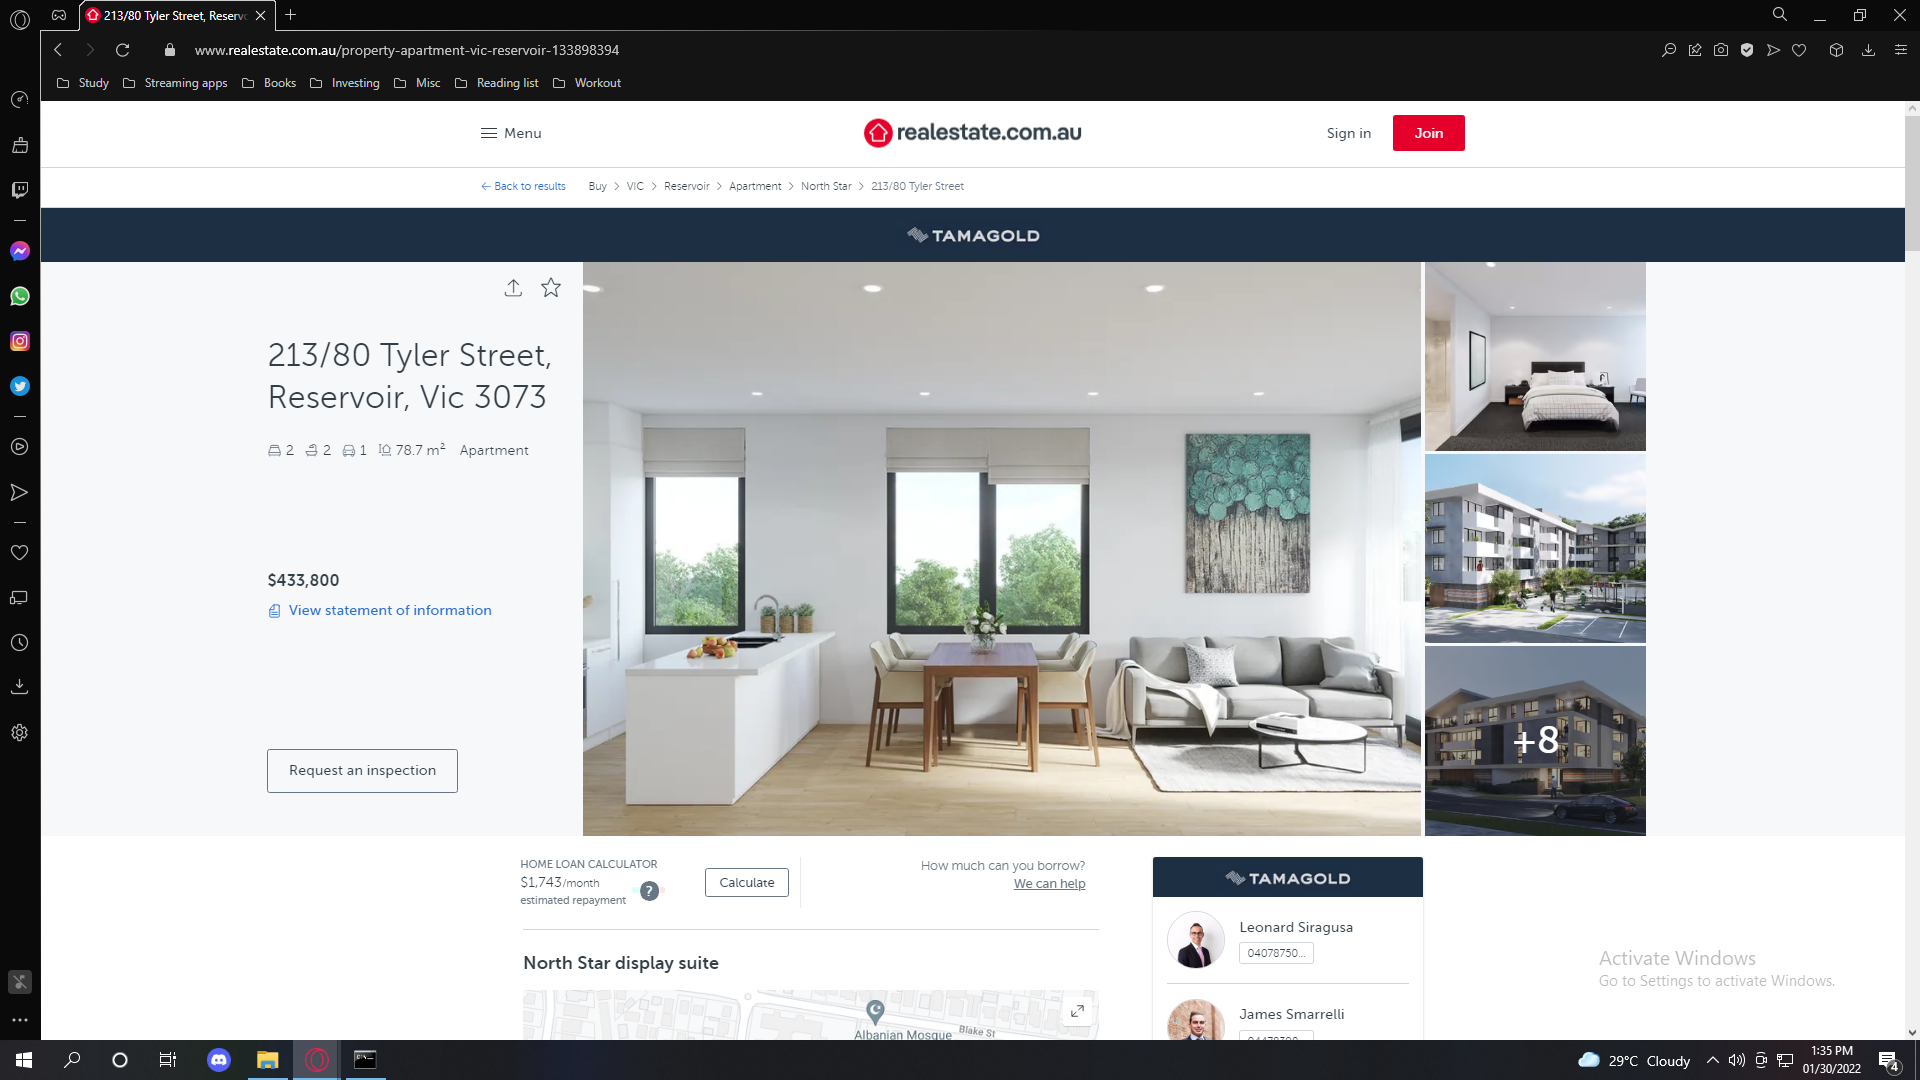

In [432]:
### Model's price prediction

In [433]:
predict_price('Reservoir',78.7, 2, 2)

428217.39726421074